# Credit Card Fraud Detection with scikit learn (Python)

### Data Import

In [1]:
import numpy as np
import pandas as pd 

#load dataset 
dataset = pd.read_csv(r'D:\Education - Certificates & Study Materials\Study Material\Datascience\Kaggle Project - Credit card fraud detection\creditcard_dataset.csv')
print(dataset.shape)

(284807, 31)


### Data Exploration

In [2]:
# checking what type of data exist
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


 * All columns are in numeric format and appear to be features extracted as a result of dimensionality reduction technique.
 * Notice that time, V1 to V28 features are at a different scale than the data in Amount variable. Therefore, it is imperative to bring all variables to same scale, especially for those algorithms that are sensitive to the scale of input variables.

In [3]:
#checking proportion of bias in the target variable - "Class"
print(dataset['Class'].value_counts())


0    284315
1       492
Name: Class, dtype: int64


 - This is highly unbalanced dataset. However, in real world scenario we do expect the number of fraud cases to be minimal. 
 - Using certain sampling / aumenting techniques we could create a balanced dataset, but we shall not do so. This will help  match the real world data and therefore the model we build can be more reliable when applied to production data later on.    

### Data Cleansing 

In [4]:
#checking missing data

missing = pd.DataFrame((dataset.isnull().sum()/dataset.shape[0])*100).transpose()
missing.index = ['Percentage_missing']
missing

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Percentage_missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* this shows that there are no missing values in the dataset.

In [5]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Feature Extraction

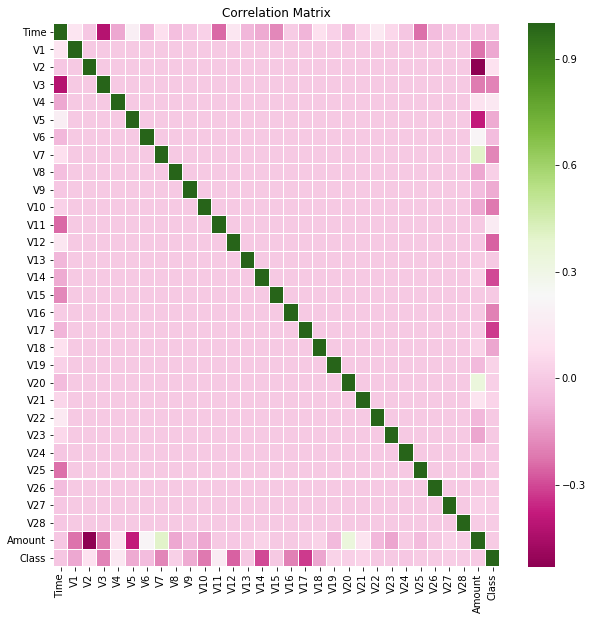

In [6]:
# checking correlation

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10))
plt.title('Correlation Matrix')

sns.heatmap(dataset.corr(), xticklabels=dataset.columns, yticklabels=dataset.columns, linewidths=0.05, cmap="PiYG")
plt.show()

Notice that-
* V1, V2, V3 & V5 are negatively correlated with Amount, and V7 & V20 are positively correlated with Amount

* V3, V11, V15, & V25 are negatively correlated with Time

* V1, V3, V7, V9, V10, V12, V14, V16, V17 are negatively correlated with Class

* At this point, we could further reduce our features which would generalize our model for better performance. But for now, lets leave it as-is to see how it performs with the already extracted PCA features.

### Preparing dataset

In [7]:
# split dataset into train & test sets 
from sklearn.model_selection import train_test_split

x, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
print("Features Shape : ", x.shape)
print("Target Shape : ", y.shape, '\n')

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 0)
print("xtrain shape : ", xtrain.shape)
print("ytrain shape : ", ytrain.shape, '\n')

print("xtest shape  : ", xtest.shape)
print("ytest shape  : ", ytest.shape)

Features Shape :  (284807, 30)
Target Shape :  (284807,) 

xtrain shape :  (199364, 30)
ytrain shape :  (199364,) 

xtest shape  :  (85443, 30)
ytest shape  :  (85443,)


In [8]:
# standardizing features as Amount is not in same scale as that of remaining features

from sklearn.preprocessing import StandardScaler

column_names = xtrain.columns

xtrain = pd.DataFrame(StandardScaler().fit_transform(xtrain), columns = column_names)
xtest = pd.DataFrame(StandardScaler().fit_transform(xtest), columns = column_names)

print("xtrain: \n", xtrain.head(), '\n')
print("xtest: \n", xtest.head(), '\n')

xtrain: 
        Time        V1        V2        V3        V4        V5        V6  \
0  0.402560 -0.067419  0.066209 -0.427936 -0.703358  1.326641  1.310295   
1  0.853047  1.082570  0.010195 -0.997703  0.080656  0.438362 -0.250646   
2  0.646288 -0.044312  0.101926  1.038206  0.484460  0.163547  0.830015   
3 -1.290102  0.688562 -0.321167  0.367027 -0.444613 -0.834837 -0.641813   
4  1.060059 -0.777711  0.392471  0.406750 -0.396458  0.612566 -0.386884   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.405967  0.523780  0.015398  ... -0.081846 -0.084033  0.007304  0.400190   
1  0.163260 -0.216420  0.348360  ... -0.112308 -0.443008 -1.083154  0.425957   
2  1.285435 -0.904559  0.692978  ...  0.068198  0.020632  1.461864 -0.652606   
3 -0.523043 -0.025306 -0.594087  ... -0.087169 -0.019907 -0.247870  0.283512   
4  0.803575 -0.078732 -0.057029  ... -0.095765 -0.297961 -0.540302 -0.341308   

        V24       V25       V26       V27       V28    Amo

Note that - 

* XBGClassifier model is not directly availble in anaconda. We need to first install it in anaconda prompt with following command
    conda install -c anaconda py-xgboost


### Predictive Modelling

In [11]:
# function to list out the various models that we will train to check which one performs better-

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier


def get_model():
    models, names = list(), list()
    
    # SVC
    models.append(SVC(kernel='rbf'))
    names.append('SVC')
    
    # KNN
    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    # RF
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('RF')    
    
    # ADABoost
    models.append(AdaBoostClassifier(n_estimators=100))
    names.append('ADABoost')

    # XGBoost
    models.append(XGBClassifier(n_estimators=100))
    names.append('XGBoost')
    
    return models, names

Note that -

* ROC is for many different levels of thresholds and thus it has many F score values. F1 score is applicable for any particular point on the ROC curve. You may think of it as a measure of precision and recall at a particular threshold value whereas AUC is the area under the ROC curve. 

* For F score to be high, both precision and recall should be high. Consequently, when you have a data imbalance between positive and negative samples, you should always use F1-score because ROC averages over all possible thresholds

In [12]:
# Train data with each model; capture F1 score and time it took to train each model 

import time 
from numpy import mean
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings('ignore')

models, names = get_model()
scores, results = list(), list()

for i in range(len(models)):
    # start timer
    start = time.time()
    
    cv = StratifiedKFold(n_splits=3, shuffle = False, random_state=1)
    scores = cross_val_score(models[i], xtrain, ytrain, scoring='f1', cv=cv)
    print ("scores are - ", scores)
    results.append(mean(scores))
        
    # stop timer
    end = time.time()
    execution_time = (end - start)/60
    
    print('At the end of iteration =', i)
    print('>%s %.3f (%.3f)' % (names[i], results[i], execution_time))
    print('\n')


scores are -  [0.7539267  0.74074074 0.71351351]
At the end of iteration = 0
>SVC 0.736 (3.067)


scores are -  [0.82629108 0.81372549 0.85849057]
At the end of iteration = 1
>KNN 0.833 (19.479)


scores are -  [0.84313725 0.85849057 0.84761905]
At the end of iteration = 2
>RF 0.850 (3.673)


scores are -  [0.79245283 0.80952381 0.8       ]
At the end of iteration = 3
>ADABoost 0.801 (2.790)


scores are -  [0.83495146 0.86915888 0.83962264]
At the end of iteration = 4
>XGBoost 0.848 (1.070)




Notice that - 
* Random forest rendered highest F1 score, indicating that it performed better than the rest of the 4 models.

* However, XGBoost was the quickest to train the data and with high F1 score. KNN model took the longest to converge.

* Therefore, when dataset size is too large, its best to go with XGBoost model, but for now, lets proceed with Random forest. 

### Model Selection

In [16]:
# Selecting the model with highest performance ( F1score ) and applying it to test dataset

print("Best performing model is ", names[results.index(max(results))], " with F1 score = ", round(max(results),3))

model = RandomForestClassifier(n_estimators=100)
model.fit(xtest, ytest)

Best performing model is  RF  with F1 score =  0.85


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Model Evaluation on Unseen (Test) data

In [26]:
# comparing confusion matrix for finalized model on train & test datasets

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_train_pred = cross_val_predict(model, xtrain, ytrain, cv=3)
y_test_pred = cross_val_predict(model, xtest, ytest, cv=3)

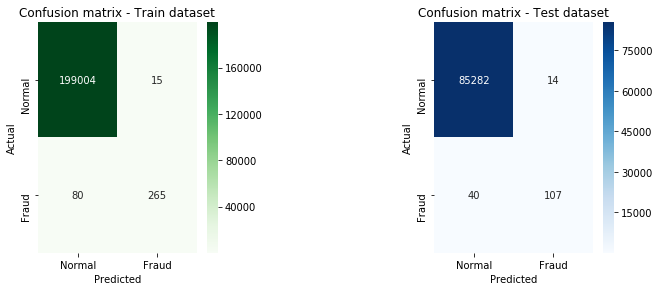

In [47]:
#Confusion matrix for Train dataset
conf_matrix_train = confusion_matrix(ytrain, y_train_pred)

plt.subplot(1,2,1)
sns.heatmap(conf_matrix_train, xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"], annot=True, fmt="d", cmap='Greens');
plt.title('Confusion matrix - Train dataset')
plt.ylabel("Actual")
plt.xlabel("Predicted")

#Confusion matrix for Test dataset
conf_matrix_test = confusion_matrix(ytest, y_test_pred)

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"], annot=True, fmt="d", cmap='Blues');
plt.title('Confusion matrix - Test dataset')
plt.ylabel("Actual")
plt.xlabel("Predicted")

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=1, 
                    hspace=0.35)
plt.show()

In [56]:
# comparing evaluation metrics for finalized model on train & test datasets

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For Train dataset
accuracy= accuracy_score(ytrain,y_train_pred)
precision= precision_score(ytrain,y_train_pred)
recall= recall_score(ytrain,y_train_pred)
f1score= f1_score(ytrain,y_train_pred)

print ("Performance metrics for Train dataset:")
print ("--------------------------------------")
print('Accuracy = {}'.format(round(accuracy, 4)))
print('F1-Score = {}'.format(round(f1score,4)))
print('\n')
print('Precision = {}'.format(precision))
print('Recall = {}'.format(recall))
print('\n')

# For Test dataset
accuracy= accuracy_score(ytest,y_test_pred)
precision= precision_score(ytest,y_test_pred)
recall= recall_score(ytest,y_test_pred)
f1score= f1_score(ytest,y_test_pred)

print ("Performance metrics for Test dataset:")
print ("-------------------------------------")
print('Accuracy = {}'.format(round(accuracy, 4)))
print('F1-Score = {}'.format(round(f1score,4)))
print('\n')
print('Precision = {}'.format(precision))
print('Recall = {}'.format(recall))

Performance metrics for Train dataset:
--------------------------------------
Accuracy = 0.9995
F1-Score = 0.848


Precision = 0.9464285714285714
Recall = 0.7681159420289855


Performance metrics for Test dataset:
-------------------------------------
Accuracy = 0.9994
F1-Score = 0.7985


Precision = 0.8842975206611571
Recall = 0.7278911564625851


Notice that - 

* Test dataset returned 5% lower F1score in test dataset though accuracy is still the same in both train & test datasets. It implies our model has variance of 5%. 

i.e. Model overfitting occurred to an extent, but how damaging is this to the business problem we are trying to solve?

* We need to assess severity of Type I & Type II errors in this case to determine if the variance is acceptable or model optimization is required.

Type I  = incorrectly predicting non-fraud transaction as a fraud one
Type II = incorrectly predicting fraud transaction as a non-fraud one

* In our business problem, TypeII error can cost the bank severely. Our model Precision has reduced by 6% and recall reduced by 4% on unseen data (note that our test dataset size is less than half the size of our training set. This could be one reason for the variance, which can be solved easily).

If our business problem can accept 72% of recall, then we are good to go with the designed model. Incase we need better performing model then we need to tweak the data or model parameters. 


### Tuning & Optimization

Usual rectification methods are - 
1. Train with more data samples (this may not always be possible in real world scenarios)
2. Remove low significant features
3. Use Cross Validation technique to average out the performance score across multiple iterations
4. Use ensembling methods (Bagging attempts to reduce the chance overfitting complex models. Bagging uses complex base models and tries to "smooth out" their predictions, while boosting uses simple base models and tries to "boost" their aggregate complexity)
5. Generalize the model (For example, you could prune a decision tree, use dropout on a neural network, or add a penalty parameter to the cost function in regression)

What we can do to improve performance of our above designed model on unseen data-

* We already used cross-validation, ensemble technique and reduced features as well (Our features were result of an already applied PCA algorithm. Nevertheless, we could further reduce them by using insights from correlation matrix).

* Therefore, we can try to tune & generalize our Random forest model by doing all or any of the following - 

    1. n_estimators: The more trees, the less likely the algorithm is to overfit. So try increasing this parameter. The lower this number, the closer the model is to a decision tree, with a restricted feature set.

    2. max_features: You should try reducing this number. This defines how many features each tree is randomly assigned. 

    3. max_depth: This parameter will reduce the complexity of the learned models, lowering over fitting risk. 

    4. min_samples_leaf: Try setting these values greater than one. This has a similar effect to the max_depth parameter, it means the branch will stop splitting once the leaves have that number of samples each.

### That's all folks!

## Happy Machine Learning !